In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import lca
import survey
from math import pi

In [2]:
jp_lca_df = lca.load()
survey_df = survey.load()

In [3]:
diet_info = pd.DataFrame({
    'diet_group': ['vegan','veggie','fish','meat50','meat','meat100'],
    'rank': [1,2,3,4,5,6],
    'color': ['#7AFF93','#1DB887','#3988C4','#FF7E96','#E9677F','#C25252'],
    'label': ['Vegan','Vegetarian','Fish Eaters','Low Meat Maters','Medium Meat Eaters','High Meat Eaters']
})

diet_color_map = dict(zip(diet_info['diet_group'], diet_info['color']))
diet_label_map = dict(zip(diet_info['diet_group'], diet_info['label']))

diet_info

diet_group  rank    color               label
0      vegan     1  #7AFF93               Vegan
1     veggie     2  #1DB887          Vegetarian
2       fish     3  #3988C4         Fish Eaters
3     meat50     4  #FF7E96     Low Meat Maters
4       meat     5  #E9677F  Medium Meat Eaters
5    meat100     6  #C25252    High Meat Eaters

In [5]:
#weighted_sum = lambda x: np.average(x, weights=survey_df.loc[x.index, 'n_participants'])
#
#df = survey_df.groupby('diet_group').agg(
#    weighted_mean_ghgs = ('mean_ghgs', weighted_sum),
#    
#)
diet_group_df = survey_df.groupby('diet_group').agg({
    'mean_ghgs': 'mean',
    'mean_land': 'mean',
    'mean_watscar': 'mean',
    'mean_eut': 'mean',
    'mean_ghgs_ch4': 'mean',
    'mean_watuse': 'mean',
    'n_participants': 'sum'
}).merge(diet_info, on='diet_group').sort_values('rank').reset_index(drop=True)

diet_group_df

#diet_group_df = diet_group_df.reset_index()
#diet_group_df = pd.merge(df, diet_info, on='diet_group')
#df['diet_color'] = df['diet_group'].map(diet_info.set_index('diet_group')['color'])
#df['diet_label'] = df['diet_group'].map(diet_info.set_index('diet_group')['label'])
#df = df.reindex(diet_info['diet_group'])
#df

diet_group  mean_ghgs  mean_land  mean_watscar   mean_eut  mean_ghgs_ch4  \
0      vegan   2.612561   4.510695  15312.488198  11.461199       0.151321   
1     veggie   4.518411   6.542007  16470.226046  17.866328       0.778792   
2       fish   5.133366   6.853120  18565.613639  21.730615       0.859837   
3     meat50   5.797222   8.662609  17817.131705  24.081761       1.091782   
4       meat   7.553983  13.086665  19284.331898  30.317774       1.506246   
5    meat100  11.425865  24.010061  22497.223846  42.258796       2.439530   

   mean_watuse  n_participants  rank    color               label  
0   450.019441         2041000     1  #7AFF93               Vegan  
1   569.308337        15751000     2  #1DB887          Vegetarian  
2   798.555192         8123000     3  #3988C4         Fish Eaters  
3   782.299134         9332000     4  #FF7E96     Low Meat Maters  
4   863.870920        11971000     5  #E9677F  Medium Meat Eaters  
5   974.222937         8286000     6  #C25252    High Meat Eaters

In [59]:
cols = [
    'mean_ghgs',
    'mean_land',
    'mean_watscar',
    'mean_eut',
    'mean_ghgs_ch4',
    'mean_watuse'
]

def max_norm(df):
    return df / df.max()

for column in cols:
    diet_group_df[column + '_norm'] = max_norm(diet_group_df[column])
diet_group_df

diet_group  mean_ghgs  mean_land  mean_watscar   mean_eut  mean_ghgs_ch4  \
0      vegan   2.612561   4.510695  15312.488198  11.461199       0.151321   
1     veggie   4.518411   6.542007  16470.226046  17.866328       0.778792   
2       fish   5.133366   6.853120  18565.613639  21.730615       0.859837   
3     meat50   5.797222   8.662609  17817.131705  24.081761       1.091782   
4       meat   7.553983  13.086665  19284.331898  30.317774       1.506246   
5    meat100  11.425865  24.010061  22497.223846  42.258796       2.439530   

   mean_watuse  n_participants  rank    color               label  \
0   450.019441         2041000     1  #7AFF93               Vegan   
1   569.308337        15751000     2  #1DB887          Vegetarian   
2   798.555192         8123000     3  #3988C4         Fish Eaters   
3   782.299134         9332000     4  #FF7E96     Low Meat Maters   
4   863.870920        11971000     5  #E9677F  Medium Meat Eaters   
5   974.222937         8286000     6  #C25252    High Meat Eaters   

   mean_ghgs_norm  mean_land_norm  mean_watscar_norm  mean_eut_norm  \
0        0.228653        0.187867           0.680639       0.271215   
1        0.395455        0.272469           0.732100       0.422784   
2        0.449276        0.285427           0.825240       0.514227   
3        0.507377        0.360791           0.791970       0.569864   
4        0.661130        0.545049           0.857187       0.717431   
5        1.000000        1.000000           1.000000       1.000000   

   mean_ghgs_ch4_norm  mean_watuse_norm  
0            0.062029          0.461927  
1            0.319239          0.584372  
2            0.352460          0.819684  
3            0.447538          0.802998  
4            0.617433          0.886728  
5            1.000000          1.000000

In [60]:

col_names = {
    'mean_ghgs': 'Mean GHG',
    'mean_land': 'Mean Land Use',
    'mean_ghgs_ch4': 'Mean CH4',
    'mean_watscar': 'Mean Water Scarcity',
    'mean_eut': 'Mean Eutrophication',
    'mean_watuse': 'Mean Water Use',
}

col_units = {
    'mean_ghgs': 'kg d⁻¹',
    'mean_land': 'm² d⁻¹',
    'mean_ghgs_ch4': 'kg d⁻¹',
    'mean_watscar': 'm³ d⁻¹',
    'mean_eut': 'gPO⁴ e d⁻¹',
    'mean_watuse': 'm³ d⁻¹'
}

col_name_units = {key: f'{col_names[key]}'+(f' ({col_units[key]})' if col_units[key] != '' else '') for key in col_names.keys()}

scattergl
violin
violin
scattergl
violin
violin
scattergl
violin
violin
scattergl
violin
violin
scattergl
violin
violin
scattergl
violin
violin


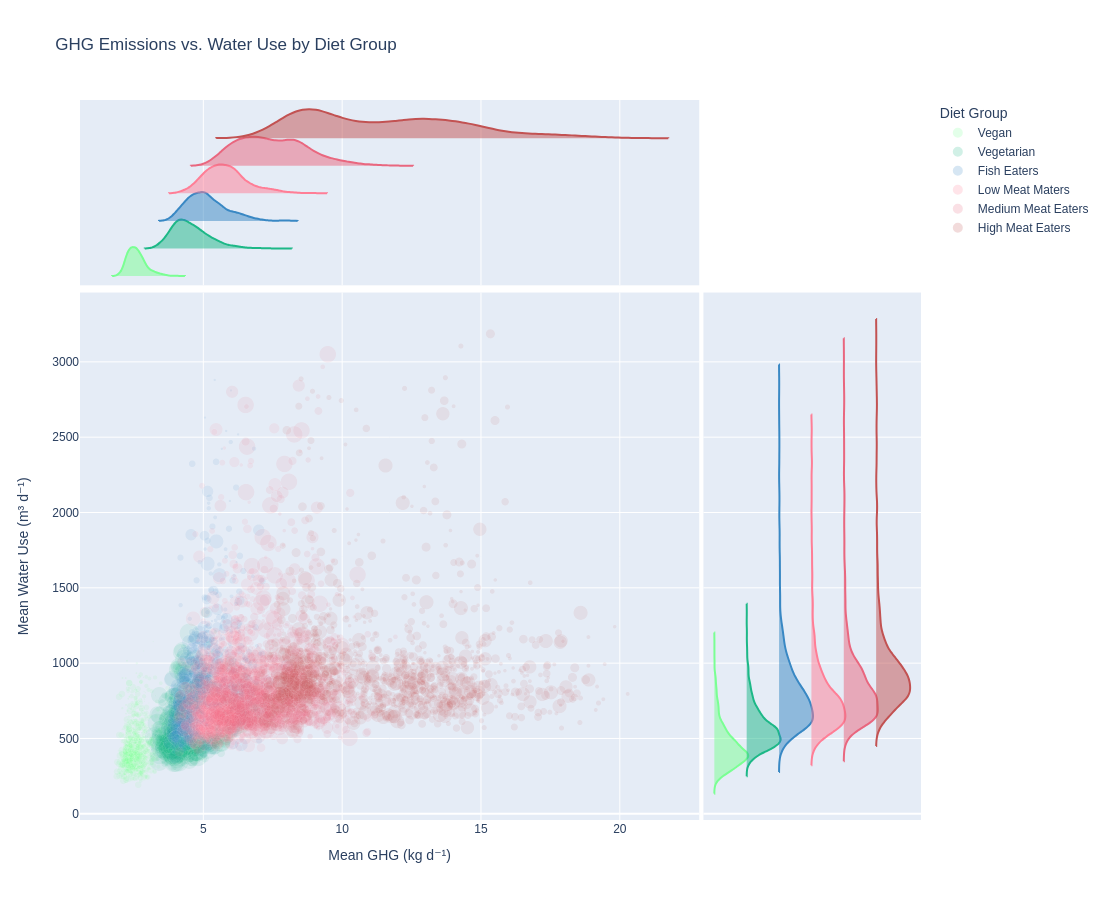

In [61]:
fig = go.Figure()

#TEMP: Drop 90% elements for performance
shuffled_df = survey_df.merge(diet_info, on='diet_group').sample(frac=0.1).reset_index(drop=True)

diet_order = list(diet_label_map.keys())

fig = px.scatter(
    shuffled_df,
    x='mean_ghgs',
    y='mean_watuse',
    color='diet_group',
    color_discrete_map=diet_color_map,
    size='n_participants',
    hover_name='grouping',
    title='GHG Emissions vs. Water Use by Diet Group',
    marginal_x='violin',
    marginal_y='violin',
    labels={'diet_group': 'Diet Group', 'n_participants': '# participants'} | col_name_units | diet_label_map,
    category_orders={'diet_group': list(diet_label_map.keys())},
    hover_data={
        'mean_ghgs': ':.3f',
        'mean_watuse': ':.3f',
        'n_participants': True,
        'diet_group': False  # hide duplicate legend info
    }
)

fig.update_layout(height=900)

# Make bubbles semi-transparent
fig.update_traces(marker=dict(opacity=0.09, line=dict(width=0.2)))

# Refine violin appearance and legend deduplication
legend_shown = set()
for trace in fig.data:
    print(trace.type)
    if trace.type == 'violin':
        trace.side = 'positive'
        trace.width = 2.1
        trace.points = False
        trace.hoverinfo = 'skip'
        trace.hovertemplate = '%{y:.3f}<extra></extra>' if trace.orientation == 'v' else '%{x:.3f}<extra></extra>'
    elif trace.type in ['scatter', 'scattergl']:
        diet_label = diet_label_map.get(trace.name, trace.name)
        trace.name = diet_label
        #if diet_label in legend_shown:
        #    trace.showlegend = False
        #else:
        #    legend_shown.add(diet_label)
        #    trace.showlegend = True

fig.show()